In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Read the CSV files
train_df = pd.read_csv("E:/HSBC/train.csv")
test_df = pd.read_csv("E:/HSBC/test.csv")

# Combine them vertically
data = pd.concat([train_df, test_df], ignore_index=True)

# Save to a new file if needed
data.to_csv("merged_data.csv", index=False)

data

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0.0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0.0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56906,CST_142412,Solarina,53,F,N,N,0.0,266824.38,3051.0,Sales staff,1.0,0.0,17791.56,64483.93,74,823.0,0,0,NaN
56907,CST_107967,Jonathan Cable,33,F,NaN,N,0.0,124310.85,365248.0,Unknown,1.0,0.0,26576.79,29851.73,60,712.0,0,0,NaN
56908,CST_134002,Robin,27,M,Y,Y,1.0,364652.81,3431.0,Laborers,3.0,0.0,28658.55,69336.96,67,674.0,0,0,NaN
56909,CST_146856,Lauren,36,F,N,Y,0.0,128769.02,16320.0,Medicine staff,1.0,0.0,11527.38,26908.03,17,684.0,0,0,NaN


In [75]:
# Check if any row in the merged DataFrame equals the column names
mask = (data == list(data.columns)).all(axis=1)

# Show rows where this happens
header_rows = data[mask]
print(header_rows)

Empty DataFrame
Columns: [customer_id, name, age, gender, owns_car, owns_house, no_of_children, net_yearly_income, no_of_days_employed, occupation_type, total_family_members, migrant_worker, yearly_debt_payments, credit_limit, credit_limit_used(%), credit_score, prev_defaults, default_in_last_6months, credit_card_default]
Index: []


In [76]:
data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0.0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0.0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0.0


In [77]:
data["credit_card_default"].value_counts(normalize=True)

credit_card_default
0.0    0.918797
1.0    0.081203
Name: proportion, dtype: float64

In [78]:
df = data.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
13726,CST_121931,David Milliken,42,M,Y,Y,0.0,510235.35,1195.0,Laborers,1.0,0.0,36638.24,138111.77,41,942.0,0,0,0.0
28269,CST_143895,Mirna,34,M,Y,N,1.0,241751.55,3044.0,Unknown,3.0,1.0,16568.29,34138.68,21,897.0,0,0,0.0
35949,CST_111287,Nicola Leske,29,F,N,Y,0.0,151943.32,7131.0,Unknown,2.0,0.0,8735.32,34747.47,10,745.0,0,0,0.0
49511,CST_124177,Smith Douglas,53,F,Y,N,0.0,308712.07,5547.0,Sales staff,1.0,0.0,35362.25,74242.46,20,670.0,0,0,NaN
55625,CST_136158,Michael,44,F,N,Y,0.0,268767.03,365252.0,Unknown,2.0,0.0,13707.06,62115.41,75,771.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50872,CST_104715,Saeed Azhar,34,F,N,Y,0.0,151679.17,4519.0,Unknown,1.0,0.0,38811.67,18721.22,51,665.0,0,0,NaN
40311,CST_112250,Kevin Drawbaugh,46,F,N,Y,0.0,313616.68,10200.0,Laborers,2.0,0.0,18003.68,107733.08,56,854.0,0,0,0.0
32461,CST_121385,Kell,50,F,NaN,Y,2.0,569766.40,151.0,Accountants,4.0,1.0,86109.04,89113.78,56,843.0,0,0,0.0
30906,CST_126453,Martinne Geller,55,F,N,Y,0.0,158206.14,365247.0,Unknown,2.0,0.0,35924.66,26391.48,16,833.0,0,0,0.0


In [79]:
# check shape and length
print(df.shape)

(30000, 19)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 13726 to 22404
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29651 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29479 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29712 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29945 non-null  float64
 11  migrant_worker           29950 non-null  float64
 12  yearly_debt_payments     29937 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

In [81]:
#gives object type column name
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
#gives non object type column name
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))


no of cat feats:  6
no of num feats:  13


In [82]:

num_feats


['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [83]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [84]:
#checks for duplicate
df.duplicated().sum()

np.int64(0)

In [85]:
#checks for missing value(NaN)
df.isnull().sum().sort_values(ascending=False).head(10)

credit_card_default     5920
no_of_children           521
owns_car                 349
no_of_days_employed      288
yearly_debt_payments      63
total_family_members      55
migrant_worker            50
credit_score               5
age                        0
customer_id                0
dtype: int64

In [86]:
print(df["credit_card_default"].value_counts())
print(df["credit_card_default"].value_counts(normalize=True))

credit_card_default
0.0    22108
1.0     1972
Name: count, dtype: int64
credit_card_default
0.0    0.918106
1.0    0.081894
Name: proportion, dtype: float64


In [87]:
#checks for number of missing (NaN) values in the categorical columns
print(df[cat_feats].isnull().sum())

customer_id          0
name                 0
gender               0
owns_car           349
owns_house           0
occupation_type      0
dtype: int64


In [88]:
#print the distribution of values (as percentages)
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_139584    0.000033
CST_156153    0.000033
CST_114203    0.000033
CST_135661    0.000033
CST_112726    0.000033
                ...   
CST_136158    0.000033
CST_124177    0.000033
CST_111287    0.000033
CST_143895    0.000033
CST_121931    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan              0.004567
David                 0.004167
Jonathan Stempel      0.003800
Jessica               0.003600
Stempel               0.003600
                        ...   
Mathieu Bonkoungou    0.000033
Jennifer Merritt      0.000033
Archana Narayanan     0.000033
Ee                    0.000033
Manolo Serapio        0.000033
Name: proportion, Length: 3492, dtype: float64


Column Name: gender
gender
F      0.659867
M      0.340100
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.662102
Y    0.337898
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6

In [89]:
#filter rows in your DataFrame df
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0.0


In [90]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

gender
F    19796
M    10204
Name: count, dtype: int64

In [91]:
# fill missing values (NaN) with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


C:\Users\devan\AppData\Local\Temp\ipykernel_19740\4059146536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [92]:
df["owns_car"].value_counts(normalize=True)

owns_car
N    0.666033
Y    0.333967
Name: proportion, dtype: float64

In [93]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

In [94]:
#Numerical features
#top 10 numerical features in your DataFrame that have the most missing values
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

credit_card_default     5920
no_of_children           521
no_of_days_employed      288
yearly_debt_payments      63
total_family_members      55
migrant_worker            50
credit_score               5
net_yearly_income          0
age                        0
credit_limit_used(%)       0
dtype: int64

In [95]:
#no_of_days_employed
#fill missing values based on the median
# If negative = unemployed, fill missing with large negative (e.g., -1) or mode

occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])
df['no_of_days_employed'].fillna(-1, inplace=True)

C:\Users\devan\AppData\Local\Temp\ipykernel_19740\1159188915.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_days_employed'].fillna(-1, inplace=True)


In [96]:
#count the total number of missing (NaN) values 
df.no_of_days_employed.isna().sum()

np.int64(0)

In [97]:
#yearly_debt_payments
#If a group median is NaN, fill with the overall median:
df['yearly_debt_payments'] = df['yearly_debt_payments'].fillna(
    df.groupby('credit_card_default')['yearly_debt_payments'].transform('median')
)
df['yearly_debt_payments'] = df['yearly_debt_payments'].fillna(df['yearly_debt_payments'].median())



In [98]:
df['yearly_debt_payments'].isna().sum()

np.int64(0)

In [99]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(10)

credit_card_default     5920
no_of_children           521
total_family_members      55
migrant_worker            50
credit_score               5
no_of_days_employed        0
net_yearly_income          0
age                        0
yearly_debt_payments       0
credit_limit_used(%)       0
dtype: int64

In [100]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [101]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

C:\Users\devan\AppData\Local\Temp\ipykernel_19740\341355721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


np.int64(0)

In [102]:
mask = df['no_of_children'].isna() & df['total_family_members'].notna()
df.loc[mask, 'no_of_children'] = (df.loc[mask, 'total_family_members'] - 2).clip(lower=0)

# Remaining: fill with median
df['no_of_children'].fillna(df['no_of_children'].median(), inplace=True)

C:\Users\devan\AppData\Local\Temp\ipykernel_19740\647375873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].median(), inplace=True)


In [103]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

credit_card_default     5920
total_family_members      55
credit_score               5
age                        0
no_of_children             0
dtype: int64

In [104]:
mask = df['total_family_members'].isna() & df['no_of_children'].notna()
df.loc[mask, 'total_family_members'] = df.loc[mask, 'no_of_children'] + 2

# Fill remaining with mode
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


C:\Users\devan\AppData\Local\Temp\ipykernel_19740\746497699.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


In [107]:
# 1. Model-based imputation for credit_card_default
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

if df['credit_card_default'].isna().sum() > 0:
    target_col = 'credit_card_default'
    data = df.copy()

    drop_cols = ['customer_id', 'some_other_id_column']  # if applicable
    drop_cols = [col for col in drop_cols if col in data.columns]
    data = data.drop(columns=drop_cols)

    X_full = pd.get_dummies(data.drop(columns=[target_col]), drop_first=True)

    known_mask = df[target_col].notna()
    X_train = X_full[known_mask]
    y_train = df.loc[known_mask, target_col]
    X_test = X_full[~known_mask]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    df.loc[~known_mask, target_col] = predicted

    print("✅ Missing 'credit_card_default' values imputed using model.")
else:
    print("✅ No missing values in 'credit_card_default'. No imputation needed.")

# 2. Re-run credit_score fill after credit_card_default is fully populated
df['credit_score'] = df['credit_score'].fillna(
    df.groupby('credit_card_default')['credit_score'].transform('median')
)

# ✅ Final Check
print("Remaining missing in credit_score:", df['credit_score'].isna().sum())


✅ No missing values in 'credit_card_default'. No imputation needed.
Remaining missing in credit_score: 0


In [108]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [109]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

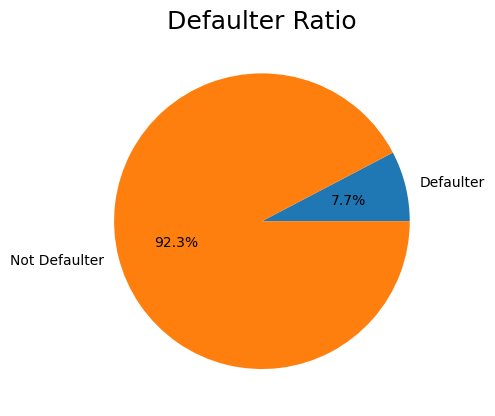

In [110]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%')
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

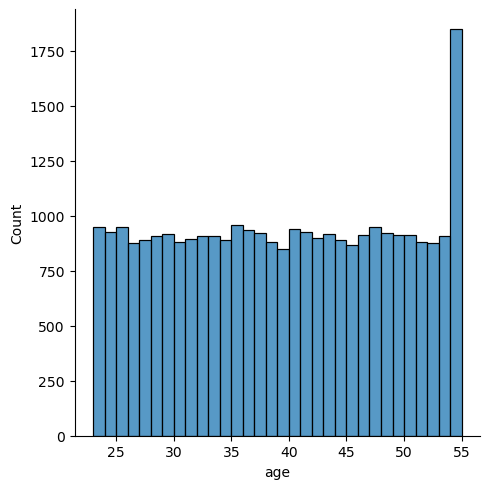

In [118]:
# visualize AGE feature - distplot
plt.figure()
sns.displot(df['age'])
plt.show()

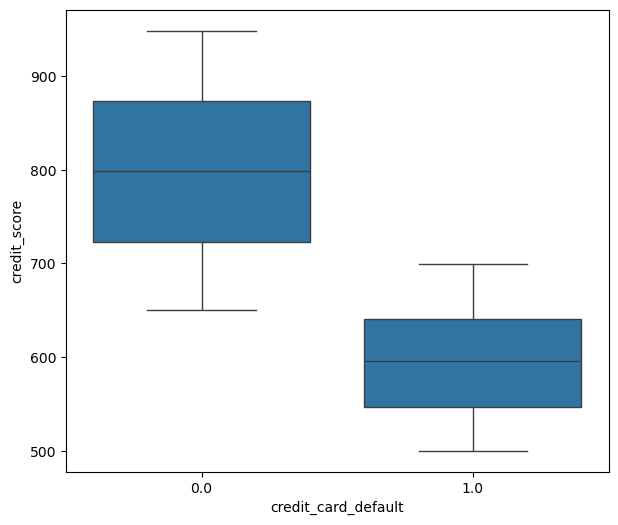

In [112]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
plt.show()


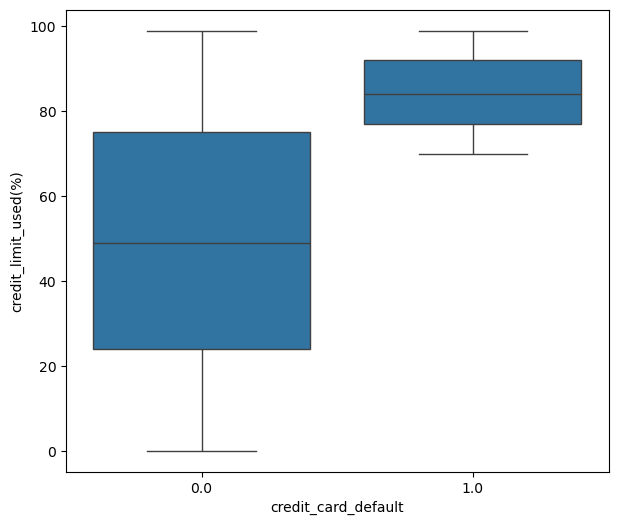

In [113]:
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
plt.show()

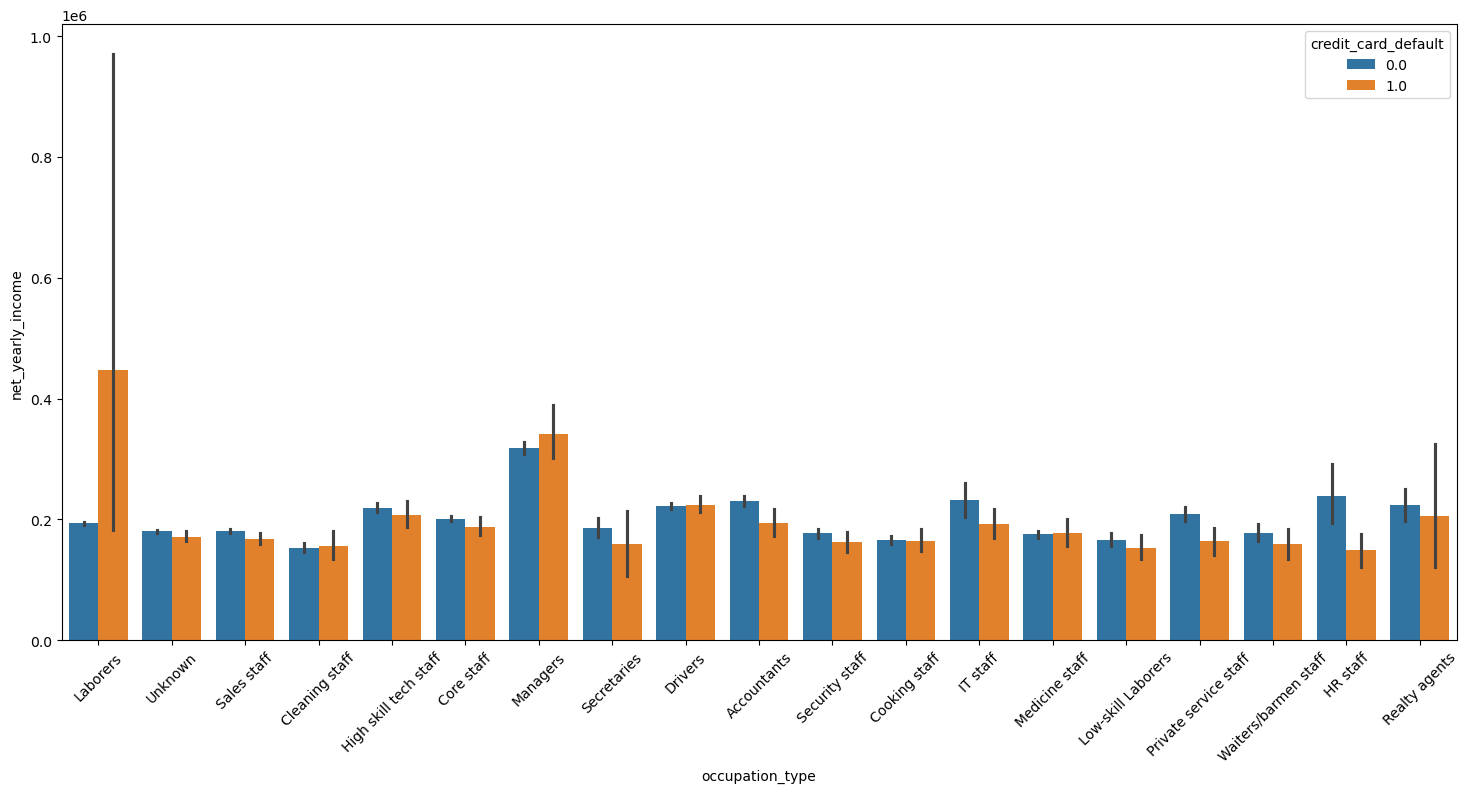

In [114]:
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()


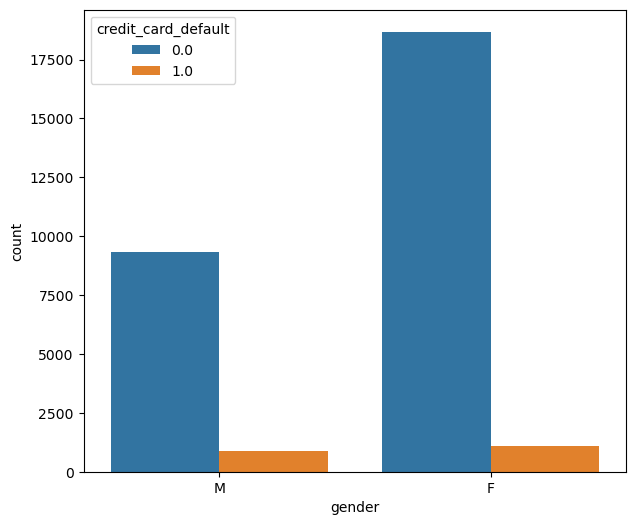

In [108]:
plt.figure(figsize=[7, 6])
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.show()

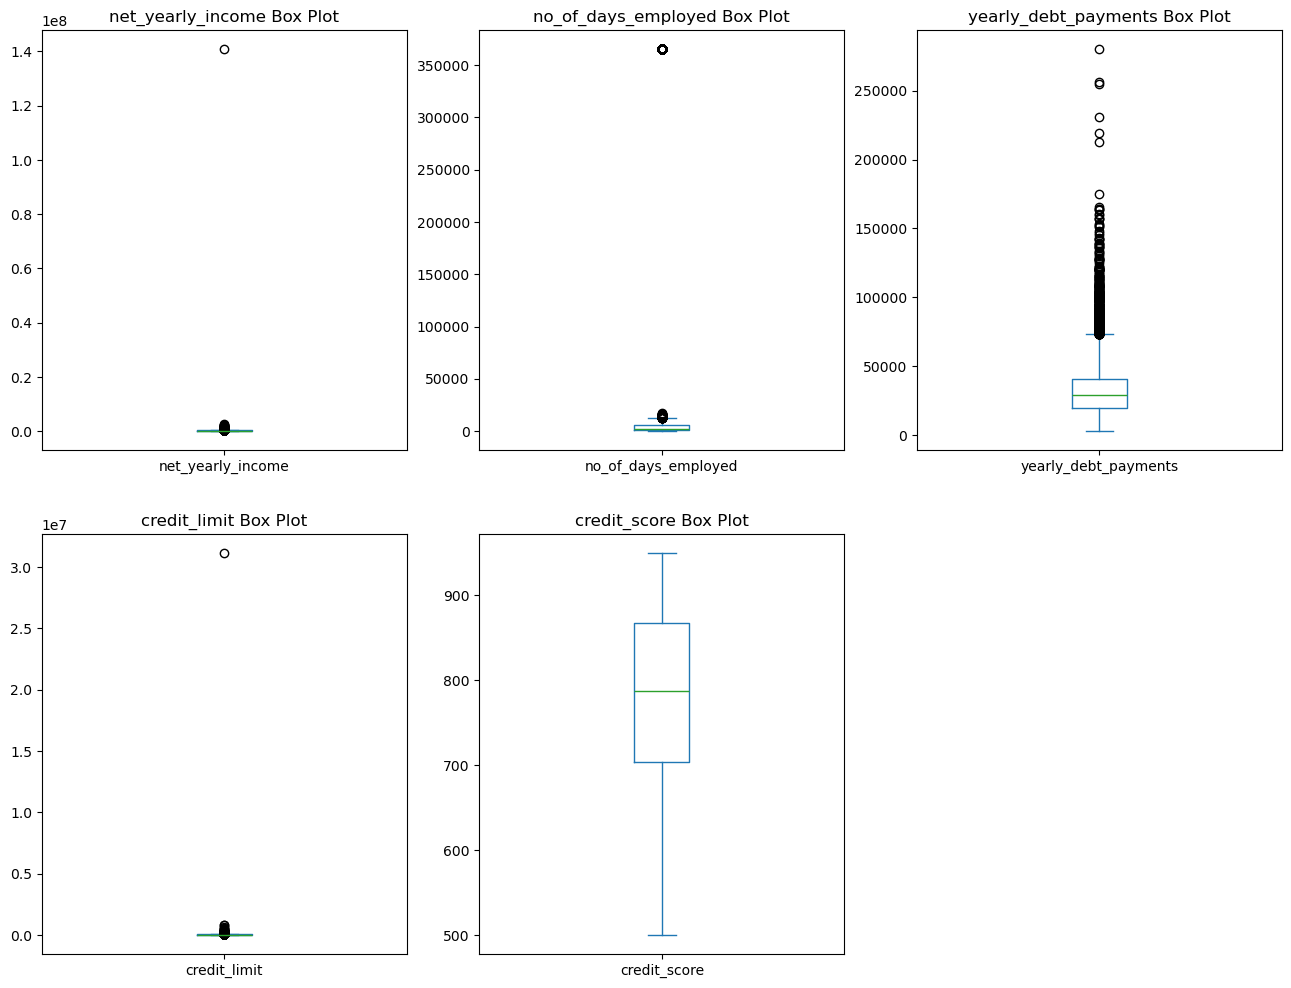

In [115]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- Define features & target ---
features = [
    'age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',
    'total_family_members', 'yearly_debt_payments', 'credit_limit',
    'credit_limit_used(%)', 'credit_score', 'prev_defaults',
    'default_in_last_6months'
]
features += [col for col in df_encoded.columns if any(prefix in col for prefix in ['gender_', 'owns_car_', 'owns_house_', 'occupation_type_', 'migrant_worker_'])]

X = df_encoded[features]
y = df_encoded['credit_card_default']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build pipeline ---
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# --- Fit model ---
pipeline.fit(X_train, y_train)

# --- Predict & evaluate ---
y_pred = pipeline.predict(X_test)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5526
         1.0       0.97      0.82      0.89       474

    accuracy                           0.98      6000
   macro avg       0.98      0.91      0.94      6000
weighted avg       0.98      0.98      0.98      6000

✅ Confusion Matrix:
[[5515   11]
 [  84  390]]


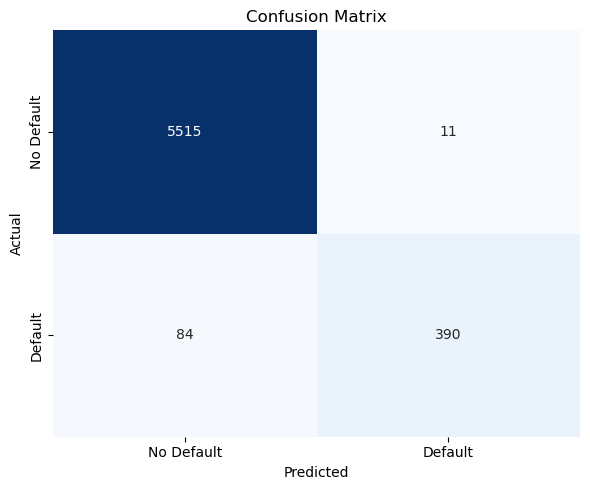

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


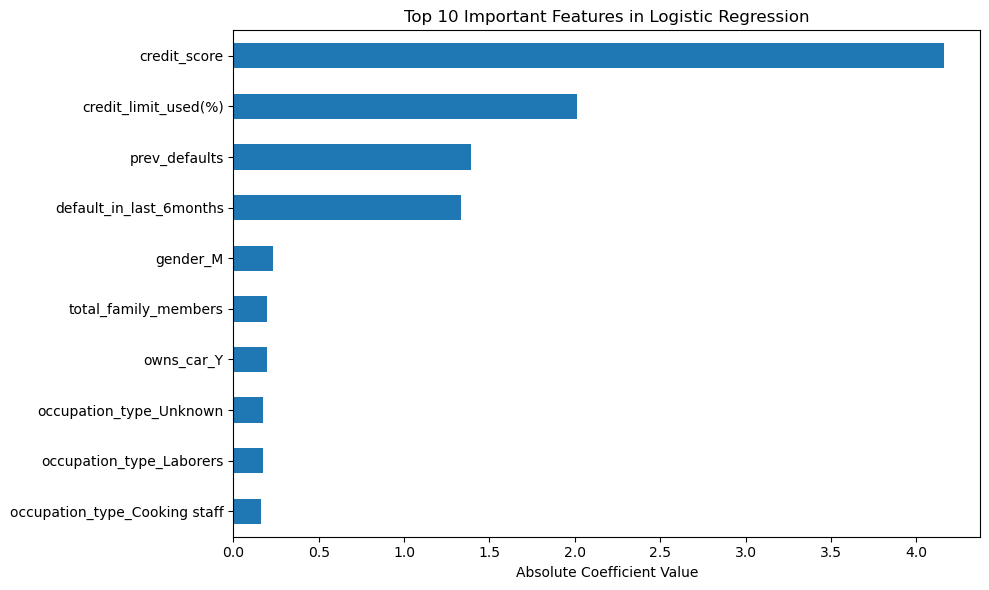

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assuming df is your DataFrame and 'credit_card_default' is your target
X = df.drop(columns=['credit_card_default'])
y = df['credit_card_default']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split and scale the data
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Plot top 15 features
coeffs = pd.Series(lr.coef_[0], index=X.columns)
top_features = coeffs.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh')
plt.title("Top 10 Important Features in Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()
